# **Exploratory Data Analysis**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf  # !pip install cufflinks

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)
cf.go_offline()

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
pd.options.display.float_format = '{:.3f}'.format
plt.rcParams["figure.figsize"] = (9, 5)

import warnings

warnings.filterwarnings('ignore')

In [2]:
df0 = pd.read_csv("DATASETS/car_dataset.csv")
df = df0.copy()

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.350,5.590,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.750,9.540,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.250,9.850,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.850,4.150,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.600,6.870,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.000,2013.628,2.892,2003.000,2012.000,2014.000,2016.000,2018.000
Selling_Price,301.000,4.661,5.083,0.100,0.900,3.600,6.000,35.000
Present_Price,301.000,7.628,8.644,0.320,1.200,6.400,9.900,92.600
Kms_Driven,301.000,36947.206,38886.884,500.000,15000.000,32000.000,48767.000,500000.000
Owner,301.000,0.043,0.248,0.000,0.000,0.000,0.000,3.000


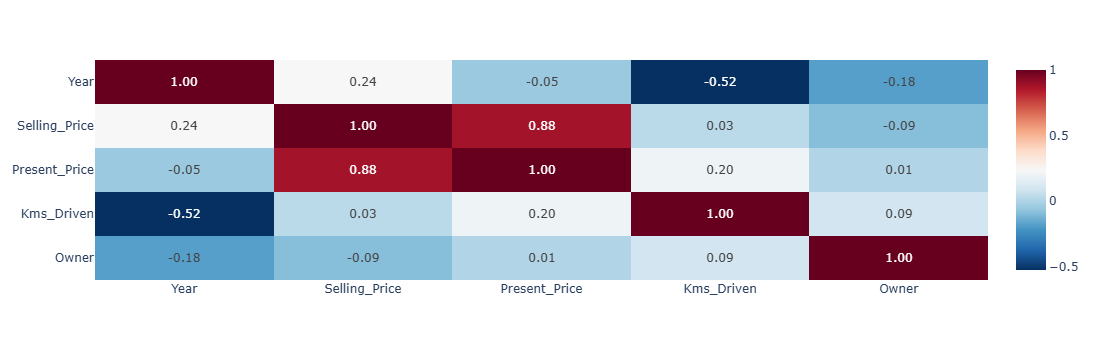

In [8]:
import plotly.express as px

numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()

fig = px.imshow(corr_matrix, text_auto='.2f', aspect="auto", color_continuous_scale='RdBu_r')
fig.show()

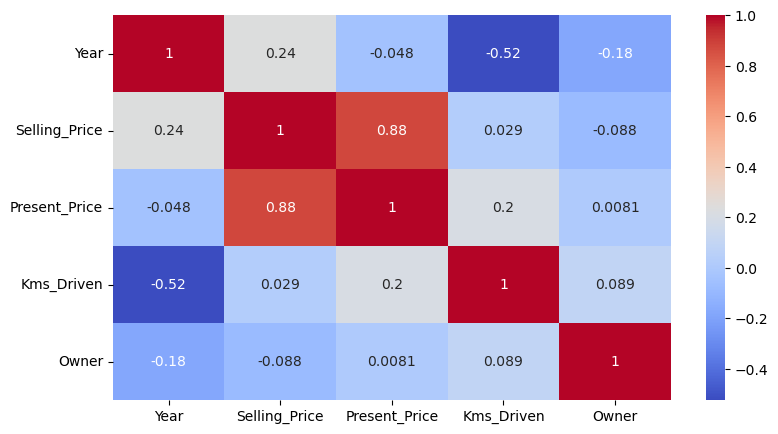

In [10]:
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm");

In [13]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.350,5.590,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.750,9.540,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.250,9.850,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.850,4.150,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.600,6.870,42450,Diesel,Dealer,Manual,0


In [14]:
df["Vehicle_Age"] = 2024 - df.Year

In [15]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Vehicle_Age
0,ritz,2014,3.350,5.590,27000,Petrol,Dealer,Manual,0,10
1,sx4,2013,4.750,9.540,43000,Diesel,Dealer,Manual,0,11
2,ciaz,2017,7.250,9.850,6900,Petrol,Dealer,Manual,0,7
3,wagon r,2011,2.850,4.150,5200,Petrol,Dealer,Manual,0,13
4,swift,2014,4.600,6.870,42450,Diesel,Dealer,Manual,0,10


In [16]:
def unique_values(df, columns):
    """Prints unique values and their counts for specific columns in the DataFrame."""

    for column_name in columns:
        print(f"Column: {column_name}\n{'-'*30}")
        unique_vals = df[column_name].unique()
        value_counts = df[column_name].value_counts()
        print(f"Unique Values ({len(unique_vals)}): {unique_vals}\n")
        print(f"Value Counts:\n{value_counts}\n{'='*40}\n")

In [17]:
cat_features = df.select_dtypes(include='object').columns
unique_values(df, cat_features)

Column: Car_Name
------------------------------
Unique Values (98): ['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS 

In [18]:
df.drop(columns=["Car_Name", "Year"], inplace=True)

In [19]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Vehicle_Age
0,3.350,5.590,27000,Petrol,Dealer,Manual,0,10
1,4.750,9.540,43000,Diesel,Dealer,Manual,0,11
2,7.250,9.850,6900,Petrol,Dealer,Manual,0,7
3,2.850,4.150,5200,Petrol,Dealer,Manual,0,13
4,4.600,6.870,42450,Diesel,Dealer,Manual,0,10


<Figure size 1200x600 with 0 Axes>

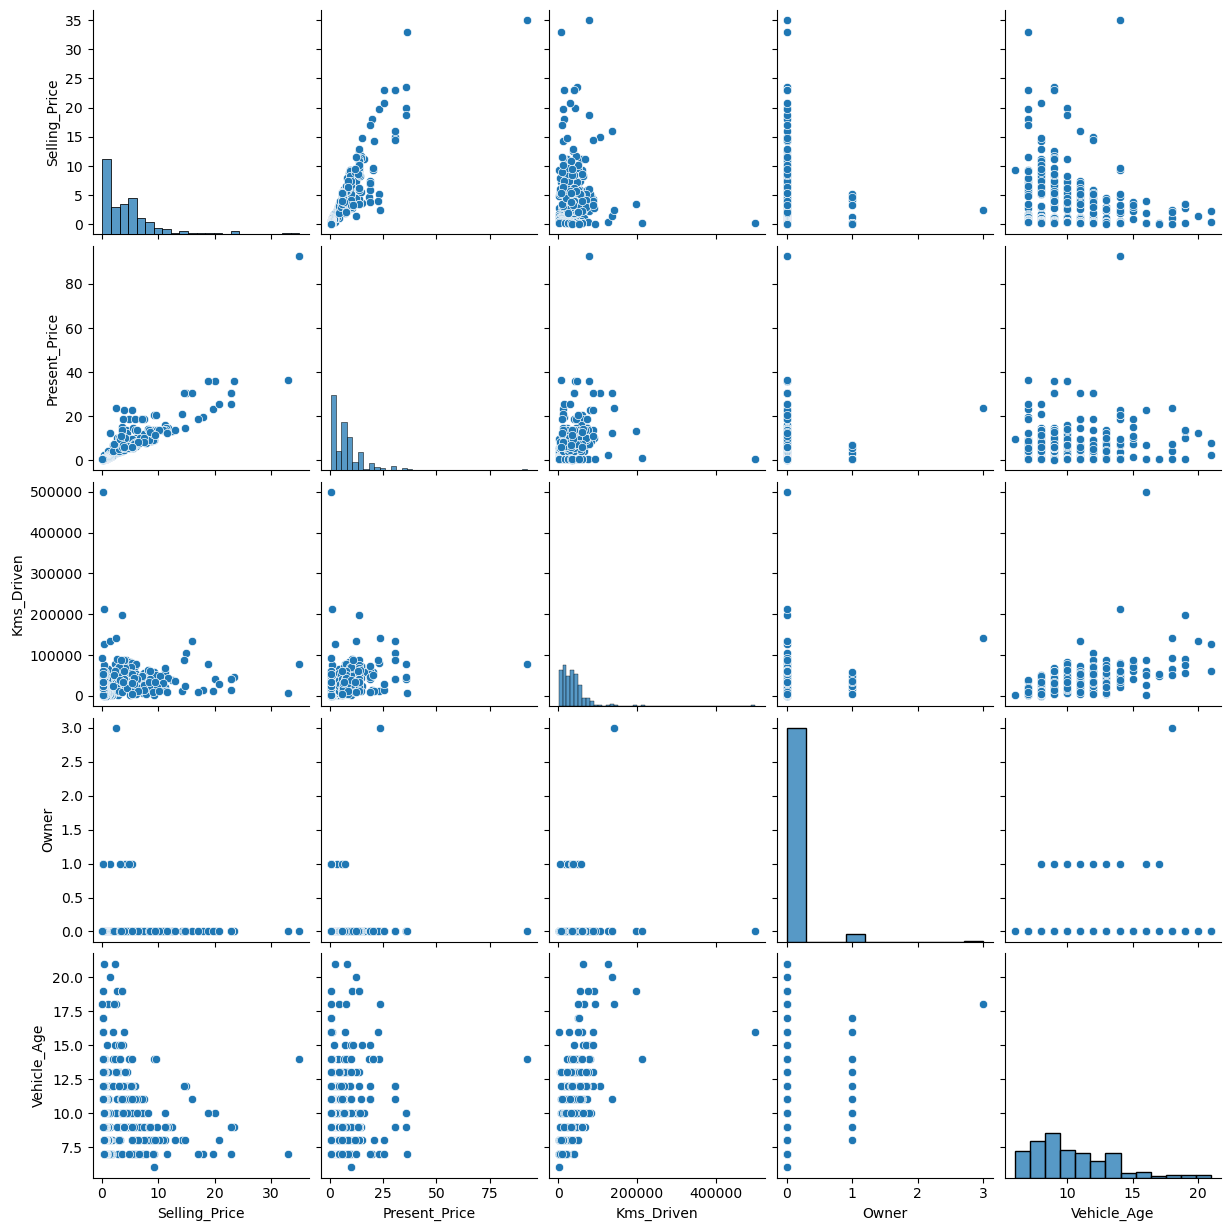

In [21]:
plt.figure(figsize=(12, 6))
sns.pairplot(df, palette="Dark2");

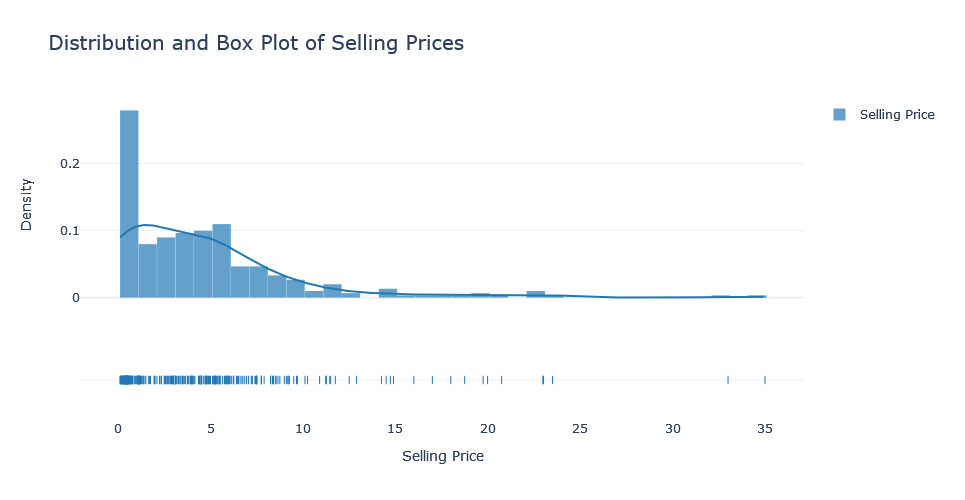

In [22]:
import plotly.figure_factory as ff

fig = ff.create_distplot([df['Selling_Price']], ['Selling Price'],
                         show_hist=True,
                         show_rug=True)

fig.update_layout(
    title_text='Distribution and Box Plot of Selling Prices',  # Başlık metni
    title_font_size=20,  # Başlık font büyüklüğü
    xaxis_title_text='Selling Price',  # X eksen başlığı
    yaxis_title_text='Density',  # Y eksen başlığı
    template='plotly_white',  # Arka planı beyaz yapıyoruz
    width=1000,  # Grafiğin genişliği
    height=500,  # Grafiğin yüksekliği
    bargap=0.01,  # Barlar arası boşluk
)

fig.show()

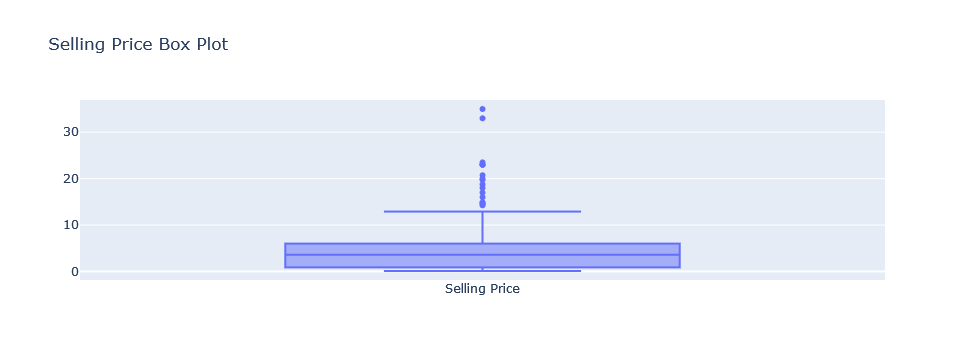

In [27]:
import plotly.graph_objs as go

box_plot = go.Box(y=df['Selling_Price'], name='Selling Price')

fig = go.Figure(data=[box_plot])
fig.update_layout(title='Selling Price Box Plot')
fig.show()

# **Modelling**

## Train | Test Split

In [28]:
X = df.drop("Selling_Price", axis=1)
y = df.Selling_Price

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=101)

print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (240, 7)
Train target shape   :  (240,)
Test features shape  :  (61, 7)
Test target shape    :  (61,)


## Modelling with Pipeline & ColumnTransformer

In [31]:
cat = X_train.select_dtypes("object").columns
cat

Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [32]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
column_trans = make_column_transformer((ord_enc, cat), remainder='passthrough')

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

operations = [("OrdinalEncoder", column_trans),
              ("DT_model", DecisionTreeRegressor(random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('DT_model', DecisionTreeRegressor(random_state=101))])

In [37]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [38]:
def train_val(model, X_train, y_train, X_test, y_test):

    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    scores = {
        "train": {
            "R2": r2_score(y_train, y_train_pred),
            "mae": mean_absolute_error(y_train, y_train_pred),
            "mse": mean_squared_error(y_train, y_train_pred),
            "rmse": np.sqrt(mean_squared_error(y_train, y_train_pred))
        },
        "test": {
            "R2": r2_score(y_test, y_pred),
            "mae": mean_absolute_error(y_test, y_pred),
            "mse": mean_squared_error(y_test, y_pred),
            "rmse": np.sqrt(mean_squared_error(y_test, y_pred))
        }
    }

    return pd.DataFrame(scores)

In [39]:
train_val(pipe_model, X_train, y_train, X_test, y_test)

,train,test
R2,1.000,0.933
mae,0.000,0.512
mse,0.000,0.646
rmse,0.000,0.804


In [40]:
from sklearn.model_selection import cross_validate, cross_val_score

operations = [("OrdinalEncoder", column_trans),
              ("DT_model", DecisionTreeRegressor(random_state=101))]
model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=[
                            'r2', 'neg_mean_absolute_error',
                            'neg_mean_squared_error',
                            'neg_root_mean_squared_error'
                        ],
                        cv=10,
                        return_train_score=True)

df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

# overfiting olduğunu teyit ettik

test_r2                              0.872
train_r2                             1.000
test_neg_mean_absolute_error        -0.828
train_neg_mean_absolute_error        0.000
test_neg_mean_squared_error         -4.450
train_neg_mean_squared_error         0.000
test_neg_root_mean_squared_error    -1.665
train_neg_root_mean_squared_error    0.000
dtype: float64

## Outlier handling to improve scores

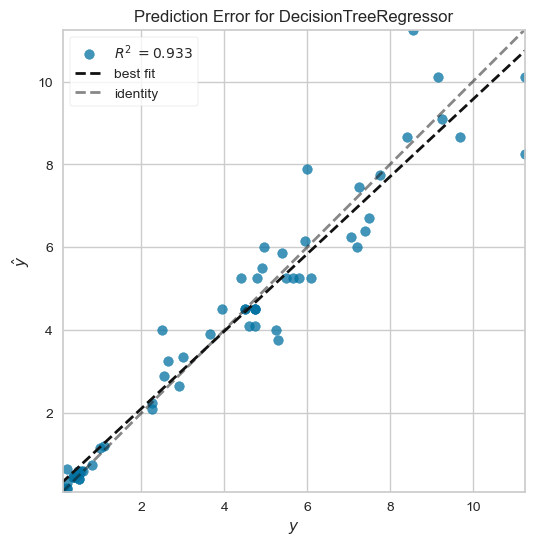

<Axes: title={'center': 'Prediction Error for DecisionTreeRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [41]:
from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz

visualizer = RadViz(size=(720, 600))

model = pipe_model
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

# 10 dan büyük fiyatların tahminleri bozduğunu gördük.

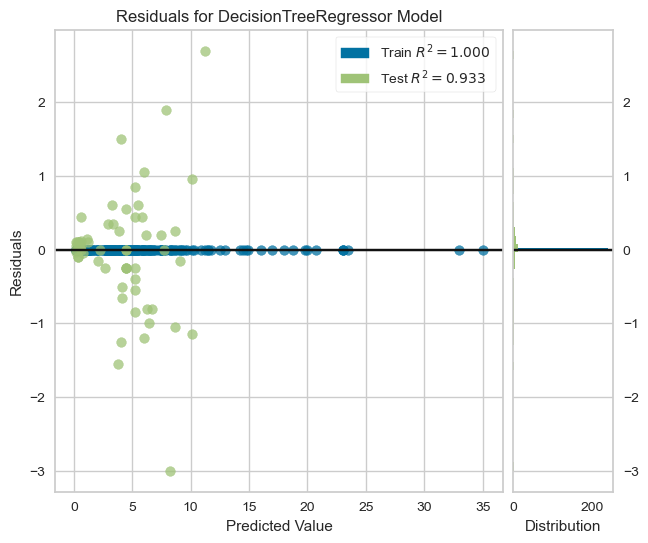

<Axes: title={'center': 'Residuals for DecisionTreeRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [42]:
from yellowbrick.regressor import ResidualsPlot

visualizer = RadViz(size=(720, 600))
model = pipe_model
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

In [43]:
print(len(df[df.Selling_Price > 10]))

28


In [44]:
df2 = df[df.Selling_Price < 10]
df2.head()

# 10'dan küçük fiyatları filtreledik

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Vehicle_Age
0,3.350,5.590,27000,Petrol,Dealer,Manual,0,10
1,4.750,9.540,43000,Diesel,Dealer,Manual,0,11
2,7.250,9.850,6900,Petrol,Dealer,Manual,0,7
3,2.850,4.150,5200,Petrol,Dealer,Manual,0,13
4,4.600,6.870,42450,Diesel,Dealer,Manual,0,10


In [45]:
X = df2.drop(columns="Selling_Price")
y = df2.Selling_Price

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=101)

In [47]:
operations = [("OrdinalEncoder", column_trans),
              ("DT_model", DecisionTreeRegressor(random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('DT_model', DecisionTreeRegressor(random_state=101))])

In [48]:
train_val(pipe_model, X_train, y_train, X_test, y_test)

# filtreleme işlemi sonrası test datamızın skorları daha da iyileşti ancak overfiting hala giderilemedi.

,train,test
R2,1.000,0.935
mae,0.000,0.493
mse,0.000,0.533
rmse,0.000,0.730


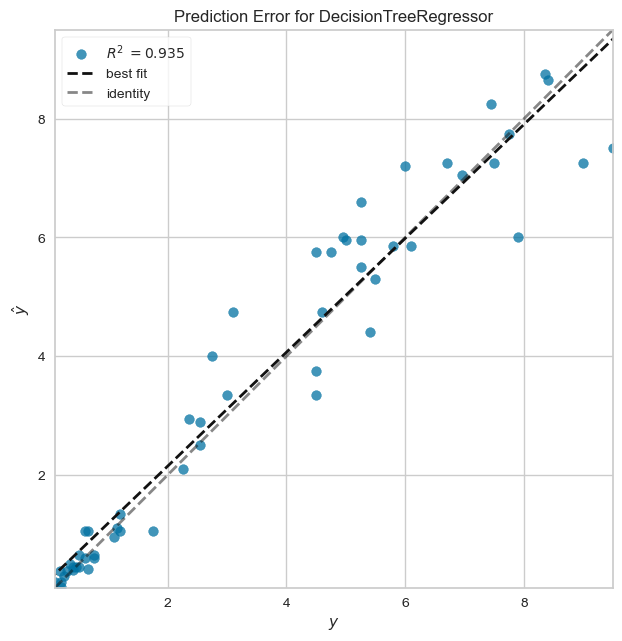

<Axes: title={'center': 'Prediction Error for DecisionTreeRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [49]:
visualizer = RadViz(size=(720, 3000))

model = pipe_model
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

# Filtreleme sonrası skorların daha iyileştiğini burda da görüyoruz.

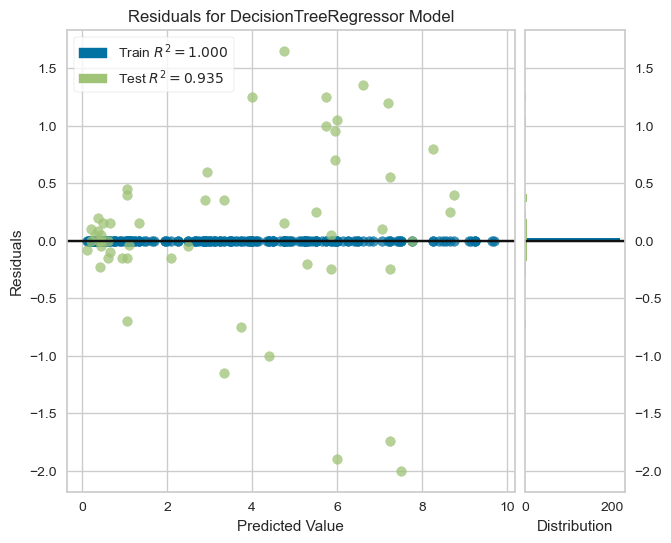

<Axes: title={'center': 'Residuals for DecisionTreeRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [50]:
from yellowbrick.regressor import ResidualsPlot

visualizer = RadViz(size=(720, 600))
model = pipe_model
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

## Overfitting Risk and Features Importance

In [51]:
operations = [("OrdinalEncoder", column_trans),
              ("DT_model", DecisionTreeRegressor(random_state=101))]
pipe_model = Pipeline(steps=operations)
pipe_model.fit(X_train, y_train)

scores = cross_validate(pipe_model,
                        X_train,
                        y_train,
                        scoring=[
                            'r2', 'neg_mean_absolute_error',
                            'neg_mean_squared_error',
                            'neg_root_mean_squared_error'
                        ],
                        cv=10,
                        return_train_score=True)

df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_r2                              0.892
train_r2                             1.000
test_neg_mean_absolute_error        -0.534
train_neg_mean_absolute_error        0.000
test_neg_mean_squared_error         -0.701
train_neg_mean_squared_error         0.000
test_neg_root_mean_squared_error    -0.814
train_neg_root_mean_squared_error    0.000
dtype: float64

In [52]:
pipe_model["DT_model"].feature_importances_

array([8.72315324e-03, 9.97470116e-04, 1.82731815e-03, 8.39118154e-01,
       2.14765459e-02, 1.55162018e-05, 1.27841843e-01])

In [53]:
features = pipe_model["OrdinalEncoder"].get_feature_names_out()
features

array(['ordinalencoder__Fuel_Type', 'ordinalencoder__Seller_Type',
       'ordinalencoder__Transmission', 'remainder__Present_Price',
       'remainder__Kms_Driven', 'remainder__Owner',
       'remainder__Vehicle_Age'], dtype=object)

In [54]:
new_features = [i.replace("ordinalencoder__", "").replace("remainder__", "") for i in features]
new_features

# ordinalencoder__ ve remainder__ ön eklerinden kurtuluyoruz.

['Fuel_Type',
 'Seller_Type',
 'Transmission',
 'Present_Price',
 'Kms_Driven',
 'Owner',
 'Vehicle_Age']

In [55]:
df_fi = pd.DataFrame(
    data=pipe_model["DT_model"].feature_importances_,
    index=new_features,  #index=X.columns
    columns=["Feature Importance"])
df_fi = df_fi.sort_values("Feature Importance", ascending=False)

df_fi

# featue importance oranlarını gösteren df'i df_fi olarak tanımladık.
# df içerisine pipe_model["DT_model"].feature_importances_ ile feature importance oranlarını, make_column_transform
# sonrası sıralaması değişen feature isimleri (new_features) index'e tanımlıyoruz.
# Sonra da feature importance değerlerini büyükten küçüğe doğru sıralıyoruz.

,Feature Importance
Present_Price,0.839
Vehicle_Age,0.128
Kms_Driven,0.021
Fuel_Type,0.009
Transmission,0.002
Seller_Type,0.001
Owner,0.000


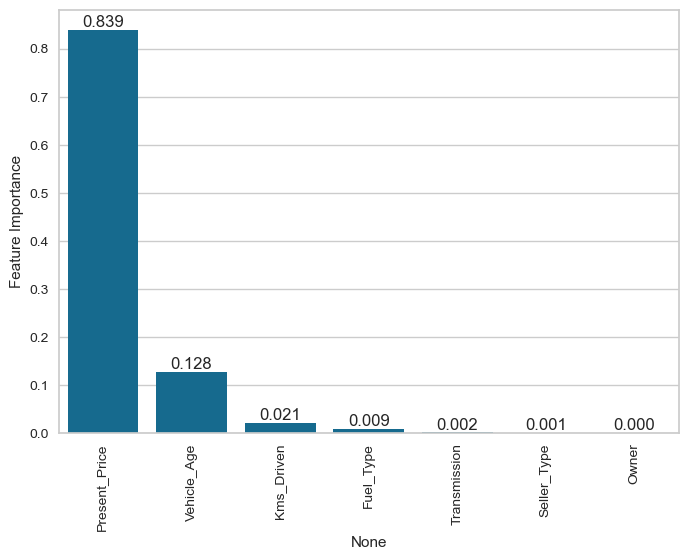

In [56]:
ax = sns.barplot(x=df_fi.index, y='Feature Importance', data=df_fi)
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.xticks(rotation=90)
plt.show()

# feature importance değerlerini barplot ile görselleştiriyoruz.
# Feature selection yaparken burdaki sıralamaya göre yapıyoruz.

In [57]:
X2 = X.drop(columns=["Present_Price"])

# en önemli feature drop edip X2 değişkenine atıyoruz.

In [58]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,
                                                        y,
                                                        test_size=0.2,
                                                        random_state=101)

# train ve test datalarını X2 datası üzerinden yapıyoruz.

In [59]:
operations = [("OrdinalEncoder", column_trans),
              ("DT_model", DecisionTreeRegressor(random_state=101))]

pipe_model2 = Pipeline(steps=operations)

pipe_model2.fit(X_train2, y_train2)

# yukarıda yaptığımız işlemleri tekrar ediyoruz.

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('DT_model', DecisionTreeRegressor(random_state=101))])

In [60]:
y_pred = pipe_model2.predict(X_test2)
y_train_pred = pipe_model2.predict(X_train2)

In [61]:
train_val(pipe_model2, X_train2, y_train2, X_test2, y_test2)

,train,test
R2,0.998,0.706
mae,0.013,1.008
mse,0.010,2.404
rmse,0.102,1.550


In [62]:
operations = [("OrdinalEncoder", column_trans),
              ("DT_model", DecisionTreeRegressor(random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train2,
                        y_train2,
                        scoring=[
                            'r2', 'neg_mean_absolute_error',
                            'neg_mean_squared_error',
                            'neg_root_mean_squared_error'
                        ],
                        cv=10,
                        return_train_score=True)
df2_scores = pd.DataFrame(scores)
df2_scores.mean()[2:]

test_r2                              0.193
train_r2                             0.999
test_neg_mean_absolute_error        -1.564
train_neg_mean_absolute_error       -0.011
test_neg_mean_squared_error         -5.214
train_neg_mean_squared_error        -0.009
test_neg_root_mean_squared_error    -2.246
train_neg_root_mean_squared_error   -0.092
dtype: float64

In [63]:
decision_tree_model = pipe_model2.named_steps["DT_model"]

feature_importances = decision_tree_model.feature_importances_

df2_fi = pd.DataFrame(data=feature_importances,
                      index=X_train2.columns,
                      columns=["Feature Importance"])

df2_fi = df2_fi.sort_values(by="Feature Importance", ascending=False)

df2_fi

,Feature Importance
Fuel_Type,0.607
Transmission,0.185
Vehicle_Age,0.152
Kms_Driven,0.035
Seller_Type,0.017
Owner,0.004


## Visualizing Trees

In [64]:
from sklearn.tree import plot_tree

In [65]:
X = df2.drop(columns="Selling_Price")
y = df2.Selling_Price

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=101)

In [67]:
operations = [("OrdinalEncoder", column_trans),
              ("DT_model", DecisionTreeRegressor(random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('DT_model', DecisionTreeRegressor(random_state=101))])

In [68]:
features = pipe_model["OrdinalEncoder"].get_feature_names_out()
features

# pipeline içerisinde make_column_transform fonksiyonu kullanıldığından feature sırlamasının değiştiğini unutmuyoruz.

array(['ordinalencoder__Fuel_Type', 'ordinalencoder__Seller_Type',
       'ordinalencoder__Transmission', 'remainder__Present_Price',
       'remainder__Kms_Driven', 'remainder__Owner',
       'remainder__Vehicle_Age'], dtype=object)

In [69]:
new_features = [i.replace("ordinalencoder__", "").replace("remainder__", "") for i in features]
new_features

# ordinalencoder__ ve remainder__ ön eklerinden kurtuluyoruz.

['Fuel_Type',
 'Seller_Type',
 'Transmission',
 'Present_Price',
 'Kms_Driven',
 'Owner',
 'Vehicle_Age']

In [70]:
pd.DataFrame(pipe_model["OrdinalEncoder"].fit_transform(X_train),
             columns=new_features)

# make_column_transform sonrası yapısı değişen df'in son hali.
# Gördüğünüz gibi kategorik featurlar en öne takiben numeric feature lar gelmiş.

,Fuel_Type,Seller_Type,Transmission,Present_Price,Kms_Driven,Owner,Vehicle_Age
0,2.000,1.000,1.000,0.540,14000.000,0.000,8.000
1,2.000,0.000,1.000,4.600,22517.000,0.000,13.000
2,2.000,0.000,1.000,5.900,9800.000,0.000,11.000
3,1.000,0.000,1.000,9.400,49000.000,0.000,11.000
4,2.000,0.000,1.000,18.610,72000.000,0.000,12.000
5,2.000,1.000,1.000,0.870,15000.000,0.000,8.000
6,2.000,0.000,1.000,7.600,50456.000,0.000,18.000
7,2.000,0.000,1.000,6.760,40000.000,0.000,10.000
8,2.000,1.000,1.000,2.400,7000.000,0.000,10.000
9,2.000,1.000,1.000,2.280,127000.000,0.000,21.000


In [71]:
X_train.head(1)

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Vehicle_Age
164,0.540,14000,Petrol,Individual,Manual,0,8


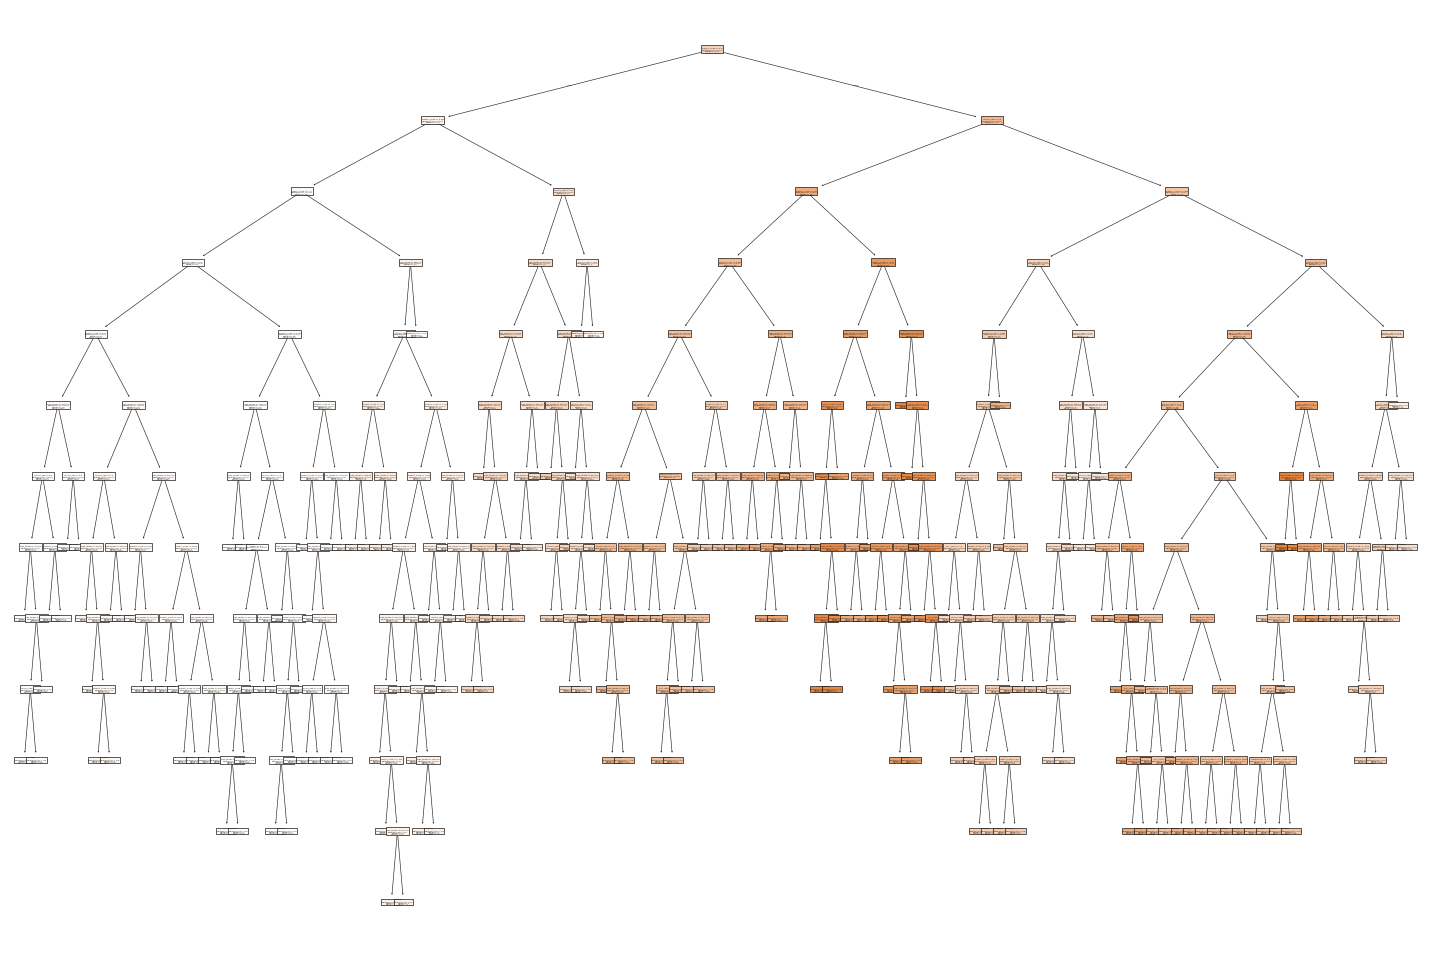

In [72]:
plt.figure(figsize=(12, 8), dpi=150)
plot_tree(pipe_model["DT_model"], filled=True, feature_names=new_features);
#feature_names=X.columns

# tree based modellerin regression problemlerinde dallanmalar classification problemlerine nazaran çok daha fazla olur.

In [73]:
def report_model(model):
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    print('\n')
    print(train_val(model, X_train, y_train, X_test, y_test))
    print('\n')
    plt.figure(figsize=(12, 8), dpi=100)
    plot_tree(model["DT_model"],
              filled=True,
              feature_names=new_features,
              fontsize=8)
    #feature_names=X.columns


# Bu fonksiyon ile train ve test seti skorlarını karşılaştırıp ağacımızı görselleştiriyoruz.



      train  test
R2    0.873 0.928
mae   0.591 0.524
mse   0.874 0.589
rmse  0.935 0.768




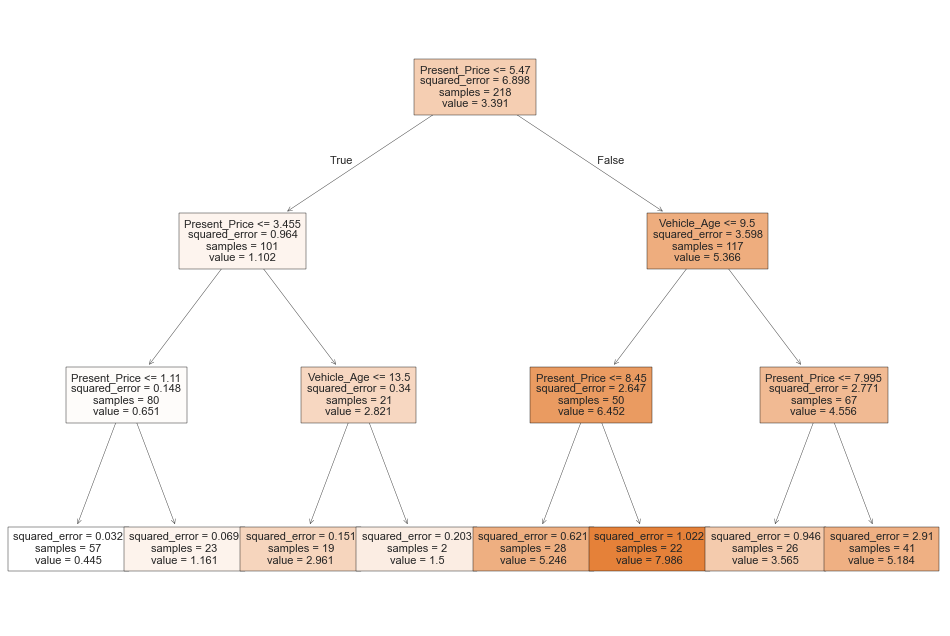

In [74]:
operations = [("OrdinalEncoder", column_trans),
              ("DT_model",
               DecisionTreeRegressor(criterion='squared_error',
                                     max_depth=3,
                                     random_state=101))]

pruned_tree = Pipeline(steps=operations)
pruned_tree.fit(X_train, y_train)

report_model(pruned_tree)

# classificationdan tek farkı criterion='squared_error'dür. Hatırlarsanız clasification da bu hyper_parametre
# gini veya entropy oluyordu.
# Regressionda criterion= "squared_error", "friedman_mse", "absolute_error", "poisson" değerlerinden birini alabiliyor.
# Ama genellikle model en iyi sonuçları "squared_error"da aldığı için default olarak bu değer kullanılıyor.

# squared error, mean squared error'ü temsil ediyor.
# Bir yaprağın errorünün 0 olması o yaparağa düşen tüm arabaların aynı fiyatta olduğunu gösterirken
# 0'a yakın bir değer olması fiyatları biribirine çok yakın arabalar olduğunu gösterir
# Yüksek bir error değeri ise o yaprağa fiyatları biribirinden çok alakasız arabaların düştüğünü gösterir.

# samples ilgili yapraktaki toplam gözlem sayısını gösterir.
# value ilgili yapraktaki gözlemlerin ortalama fiyatını gösterir.
# predict ettiğimiz bir gözlem hangi yaprağa düşerse o yapraktaki value değeri arabanın model tarafından
# tahmin edilen değeri olur.

## GridSearch

In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
operations = [("OrdinalEncoder", column_trans),
              ("DT_model", DecisionTreeRegressor(random_state=101))]

pipe_model = Pipeline(steps=operations)

In [77]:
param_grid = {
    "DT_model__splitter": ["best", "random"],
    "DT_model__criterion": ["squared_error", "friedman_mse", "absolute_error"],
    "DT_model__max_depth": [2, 3,],
    "DT_model__min_samples_leaf": [1, 2, 3],
    "DT_model__min_samples_split": [2, 3],
    "DT_model__max_features": [4, 5, None]
}

In [78]:
grid_model = GridSearchCV(estimator=pipe_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs=-1,
                          return_train_score=True)

In [79]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                                       ('DT_model',
                                        DecisionTreeRegressor(random_state=101))]),
             n_jobs=-1,
             param_grid={'DT_model__criterion': ['squared_error',
                                                 'friedman_mse',
                                                 'absolute_error'],
                         'DT_model__max_depth': [2, 3],
                         'DT_model__max_features': [4, 5, None],
                         'DT_model__min_samples_leaf': [1, 2, 3],
                         'DT_model__min_samples_split': [2, 3],
                         'DT_model__splitter': ['best', 'random']},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [80]:
grid_model.best_estimator_  # sdece default haricileri verir

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('DT_model',
                 DecisionTreeRegressor(criterion='absolute_error', max_depth=3,
                                       random_state=101))])

In [81]:
grid_model.best_params_

{'DT_model__criterion': 'absolute_error',
 'DT_model__max_depth': 3,
 'DT_model__max_features': None,
 'DT_model__min_samples_leaf': 1,
 'DT_model__min_samples_split': 2,
 'DT_model__splitter': 'best'}

In [82]:
index = grid_model.best_index_
index

204

In [83]:
pd.DataFrame(
    grid_model.cv_results_).loc[index, ["mean_test_score", "mean_train_score"]]

mean_test_score    -1.074
mean_train_score   -0.975
Name: 204, dtype: object

In [84]:
grid_model.best_score_

-1.0740459549634755

In [85]:
train_val(grid_model, X_train, y_train, X_test, y_test)

# test datası skorları ile CV'dan aldığımız validation seti skorlarının tutarlı olduğunu gördük.

,train,test
R2,0.861,0.877
mae,0.621,0.700
mse,0.957,1.010
rmse,0.978,1.005


In [87]:
from sklearn.model_selection import cross_validate, cross_val_score

operations = [("OrdinalEncoder", column_trans),
              ("DT_model",
               DecisionTreeRegressor(criterion="absolute_error",
                                     max_depth=3,
                                     random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=[
                            'r2', 'neg_mean_absolute_error',
                            'neg_mean_squared_error',
                            'neg_root_mean_squared_error'
                        ],
                        cv=10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

# tüm metricleri görmek için de CV yapabiliriz.
# CVdaki tüm iterasyonlara baktığımızda bazı skorların çok farklı olduğunu görebiliyoruz. Çok küçük datalarda beklenen
# bir durumdur.

test_r2                              0.813
train_r2                             0.862
test_neg_mean_absolute_error        -0.746
train_neg_mean_absolute_error       -0.609
test_neg_mean_squared_error         -1.222
train_neg_mean_squared_error        -0.953
test_neg_root_mean_squared_error    -1.074
train_neg_root_mean_squared_error   -0.975
dtype: float64

In [88]:
train_val(grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.861,0.877
mae,0.621,0.700
mse,0.957,1.010
rmse,0.978,1.005


# Compare real and predicted result

In [89]:
y_pred = grid_model.predict(X_test)
my_dict = { 'Actual': y_test, 'Pred': y_pred, 'Residual': y_test-y_pred }
compare = pd.DataFrame(my_dict)

# modelin tahminleri başarılı bir şekilde yapıp yapamadığı görmek için gerçek, tahmin edilen değerler ile residulları
# karşılaştırıyoruz.

In [90]:
comp_sample = compare.sample(20)
comp_sample

,Actual,Pred,Residual
13,6.100,6.950,-0.850
251,5.000,6.950,-1.950
261,5.500,4.575,0.925
180,0.300,0.285,0.015
12,7.500,6.950,0.550
205,5.250,4.575,0.675
136,0.650,1.150,-0.500
4,4.600,4.575,0.025
291,5.400,4.575,0.825
169,0.400,0.510,-0.110


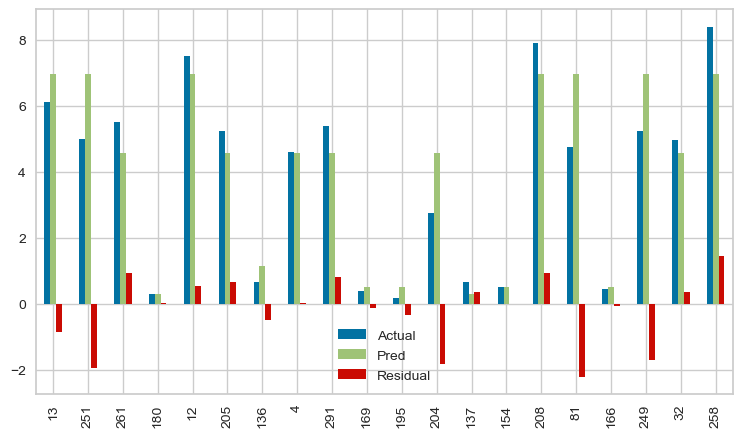

In [91]:
comp_sample.plot(kind='bar',figsize=(9,5))
plt.show()

# Final Model & Prediction

In [92]:
X=df2.drop("Selling_Price", axis=1)
y=df2.Selling_Price

In [93]:
X.head()

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Vehicle_Age
0,5.590,27000,Petrol,Dealer,Manual,0,10
1,9.540,43000,Diesel,Dealer,Manual,0,11
2,9.850,6900,Petrol,Dealer,Manual,0,7
3,4.150,5200,Petrol,Dealer,Manual,0,13
4,6.870,42450,Diesel,Dealer,Manual,0,10


In [94]:
from sklearn.pipeline import Pipeline

operations = [("Ordinalcoder", column_trans),
              ("DT_model",
               DecisionTreeRegressor(criterion="absolute_error",
                                     max_depth=3,
                                     random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X, y)

# final modelimizi en iyi hyper parametrelerle tüm data için yenden kuruyoruz.

Pipeline(steps=[('Ordinalcoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('DT_model',
                 DecisionTreeRegressor(criterion='absolute_error', max_depth=3,
                                       random_state=101))])

In [95]:
X.head()

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Vehicle_Age
0,5.590,27000,Petrol,Dealer,Manual,0,10
1,9.540,43000,Diesel,Dealer,Manual,0,11
2,9.850,6900,Petrol,Dealer,Manual,0,7
3,4.150,5200,Petrol,Dealer,Manual,0,13
4,6.870,42450,Diesel,Dealer,Manual,0,10


In [96]:
X.describe()

,Present_Price,Kms_Driven,Owner,Vehicle_Age
count,273.000,273.000,273.000,273.000
mean,5.879,36516.941,0.048,10.527
std,4.955,39529.116,0.260,2.943
min,0.320,500.000,0.000,6.000
25%,0.990,15001.000,0.000,8.000
50%,5.700,32000.000,0.000,10.000
75%,8.920,48000.000,0.000,12.000
max,23.730,500000.000,3.000,21.000


In [97]:
samples = {"Present_Price": [6.5, 9],
           "Kms_Driven": [22000, 41000],
           "Fuel_Type":["Petrol", "Diesel"],
           'Seller_Type':['Dealer', 'Individual'],
           'Transmission': ['Manual', 'Automatic'],
           "Owner":[0,1],
           "Vehicle_Age":[2, 8]}

In [98]:
df_samples = pd.DataFrame(samples)
df_samples

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Vehicle_Age
0,6.500,22000,Petrol,Dealer,Manual,0,2
1,9.000,41000,Diesel,Individual,Automatic,1,8


In [99]:
pipe_model.predict(df_samples)

array([4.65, 6.9 ])